## Importing Libraries

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [169]:
data = pd.read_csv('/content/Amazon Sale Report.csv')
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


## 1. Data Overview Check for Missing Values and Others

In [170]:
print('Number of Rows in the data',data.shape[0])
print('Number of Columns in the data',data.shape[1])

Number of Rows in the data 128976
Number of Columns in the data 21


In [171]:
data.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


`New and Pendings has almost 0 data in it all values are null so remving them is the best thing we'll do it later and other columns values can be fixed so we'll also fix them`

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

`Date column is in object datatype we need to convert it into datetime`

In [173]:
for column in data:
  print(f'{column}\n{data[column].unique()}\n')

index
[     0      1      2 ... 128972 128973 128974]

Order ID
['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']

Date
['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-2022' '04-11-2022' '04-10-2022' '04-09-2022' '04-08-2022'
 '04-07-2022' '04-06-2022' '04-05-2022' '04-04-2022' '04-03-2022'
 '04-02-2022' '04-01-2022' '03-31-22' '05-31-22' '05-30-22' '05-29-22'
 '05-28-22' '05-27-22' '05-26-22' '05-25-22' '05-24-22' '05-23-22'
 '05-22-22' '05-21-22' '05-20-22' '05-19-22' '05-18-22' '05-17-22'
 '05-16-22' '05-15-22' '05-14-22' '05-13-22' '05-12-2022' '05-11-2022'
 '05-10-2022' '05-09-2022' '05-08-2022' '05-07-2022' '05-06-2022'
 '05-05-2022' '05-04-2022' '05-03-2022' '05-02-2022' '05-01-2022'
 '06-29-22' '06-28-22' '06-27-22' '06-26-22' '06-2

In [174]:
data.duplicated().sum()

168

## 2. Descriptive Statistics Quantitative Analysis

In [175]:
# To get descriptive knowledge about the data
data.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [176]:
# Checking for the values distribution of the categorical columns in the data
# for that let's separte all categorical column togther
cat_col = data.select_dtypes(include=['object', 'category']).columns
cat_col

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'currency',
       'ship-city', 'ship-state', 'ship-country', 'fulfilled-by'],
      dtype='object')

In [177]:
for i in cat_col:
  print(f'\n{data[i].value_counts()}\n')


Order ID
403-4984515-8861958    12
171-5057375-2831560    12
404-9932919-6662730    11
403-0173977-3041148    11
408-3317403-1729937    10
                       ..
171-9107779-6893116     1
408-9376298-8017114     1
407-3992093-3258734     1
408-7043395-8664315     1
408-7436540-8728312     1
Name: count, Length: 120229, dtype: int64


Date
05-03-2022    2085
05-02-2022    2079
05-04-2022    2015
04-14-22      1883
04-15-22      1853
              ... 
06-23-22      1090
06-24-22      1028
06-25-22      1026
06-29-22       658
03-31-22       171
Name: count, Length: 91, dtype: int64


Status
Shipped                          77815
Shipped - Delivered to Buyer     28756
Cancelled                        18334
Shipped - Returned to Seller      1954
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping 

## 3. Data Cleaning

`Before we filling the nul values and chaning the datatypes firstly, we create a new dataframe as our original ones because canging or modifiy original one directly is not a good practice`

In [178]:
# Creating a new dataframe same as orginal one
df = data.copy()

In [179]:
# Filling the null values of curreny and country beacuse we known this data is all about India
df['currency'] = df['currency'].fillna('INR')
df['ship-country'] = df['ship-country'].fillna('IN')

In [180]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [181]:
# Removing unwanted columns from the data
df.drop(columns=['New','PendingS'],inplace=True)

In [182]:
# Droping duplicates
df.drop_duplicates(keep=False,inplace=True)

In [183]:
df.duplicated().sum()

0

In [184]:
df.dropna(subset=['ship-city'], inplace=True)
df.dropna(subset=['ship-state'], inplace=True)
df.dropna(subset=['ship-postal-code'], inplace=True)

In [185]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [186]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'ANDHRA PRADESH', 'RAJASTHAN', 'DELHI', 'HARYANA',
       'TELANGANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ODISHA',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'NAGALAND', 'Gujarat',
       'UTTARAKHAND', 'BIHAR', 'JAMMU & KASHMIR', 'PUNJAB',
       'HIMACHAL PRADESH', 'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA',
       'MANIPUR', 'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'CHANDIGARH',
       'SIKKIM', 'Delhi', 'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan',
       'Manipur', 'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM',
       'punjab', 'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur',
       'Puducherry', 'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP',
       'goa', 'PB', 'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry',
       'Sikkim', 'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram',
       'rajsthan', 'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [187]:
df['ship-state'].replace({'RJ': 'RAJASTHAN', 'Rajasthan': 'RAJASTHAN','rajasthan':'RAJASTHAN'})
replace_values = {
                  'RJ': 'RAJASTHAN',
                  'Rajasthan': 'RAJASTHAN',
                  'rajasthan':'RAJASTHAN',
                  'Rajshthan':'RAJASTHAN',
                  'rajsthan':'RAJASTHAN',
                  'Rajsthan':'RAJASTHAN',
                  'delhi' : 'DELHI',
                  'Delhi':'DELHI',
                  'Orissa':'ODISHA',
                  'orissa':'ODISHA',
                  'Gujarat':'GUJARAT',
                  'bihar':'BIHAR',
                  'Bihar':'BIHAR',
                  'punjab':'PUNJAB',
                  'PB':'PUNJAB',
                  'Punjab':'PUNJAB',
                  'Goa':'GOA',
                  'goa':'GOA',
                  'NL':'NAGALAND',
                  'Nagaland':'NAGALAND',
                  'Pondicherry':'PONDICHERRY',
                  'Mizoram':'MIZORAM',
                  'Sikkim':'SIKKIM',
                  'Arunachal pradesh':'ARUNACHAL PRADESH',
                  'Arunachal Pradesh':'ARUNACHAL PRADESH',
                  'AR':'ARUNACHAL PRADESH',
                  'Chandigarh':'CHANDIGARH',
                  'Pondicherry':'PUDUCHERRY',
                  'Puducherry':'PUDUCHERRY',
                  'Manipur':'MANIPUR',
                  'Meghalaya':'MEGHALAYA',
                  'Punjab/Mohali/Zirakpur':'PUNJAB',
                  'Odisha':'ODISHA'





}

# Replace values in the 'Status' column
df['ship-state'] = df['ship-state'].replace(replace_values)

In [188]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'ANDHRA PRADESH', 'RAJASTHAN', 'DELHI', 'HARYANA',
       'TELANGANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ODISHA',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'NAGALAND', 'GUJARAT',
       'UTTARAKHAND', 'BIHAR', 'JAMMU & KASHMIR', 'PUNJAB',
       'HIMACHAL PRADESH', 'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA',
       'MANIPUR', 'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'CHANDIGARH',
       'SIKKIM', 'ANDAMAN & NICOBAR', 'MIZORAM', 'New Delhi',
       'LAKSHADWEEP', 'APO'], dtype=object)

In [189]:
df[df['ship-state'] == 'APO']['Amount'].sum()

0.0

In [190]:
# Droping the APO state
df = df[df['ship-state'] != 'APO']

In [191]:
df[df['Amount'] == df['Amount'].isna()]['ship-state'].unique()

array(['ODISHA', 'DELHI', 'WEST BENGAL', 'PUNJAB', 'MAHARASHTRA',
       'UTTAR PRADESH', 'JHARKHAND', 'ASSAM', 'KARNATAKA', 'PUDUCHERRY',
       'TELANGANA', 'BIHAR', 'GUJARAT', 'HARYANA', 'TAMIL NADU', 'KERALA',
       'RAJASTHAN', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'CHANDIGARH',
       'ANDHRA PRADESH', 'GOA', 'UTTARAKHAND', 'CHHATTISGARH',
       'MADHYA PRADESH', 'TRIPURA', 'LADAKH', 'ANDAMAN & NICOBAR',
       'MANIPUR', 'New Delhi', 'SIKKIM', 'MEGHALAYA', 'ARUNACHAL PRADESH'],
      dtype=object)

In [192]:
df[df['Amount'] == df['Amount'].isna()]['Qty'].unique()

array([1])

`Handling missing values`

In [193]:
# creating new dataframe where it consist of only missing value in 'Amount' column
na_amount = df[df['Amount'] == df['Amount'].isna()]
na_amount

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
213,212,408-4547464-4180323,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XXL,Shipped,1,INR,0.0,BHUBANESWAR,ODISHA,752054.0,IN,False,Easy Ship
375,374,408-5020509-5674715,04-30-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,0.0,NEW DELHI,DELHI,110096.0,IN,False,Easy Ship
386,385,408-3137526-3167563,04-30-22,Shipped,Amazon,Amazon.in,Standard,Shirt,L,Shipped,1,INR,0.0,DARJEELING,WEST BENGAL,734101.0,IN,False,NaN
389,388,408-7971979-8745937,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XS,Shipped,1,INR,0.0,LUDHIANA,PUNJAB,141001.0,IN,False,Easy Ship
393,392,408-0912805-7526753,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,0.0,MUMBAI,MAHARASHTRA,400101.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128551,128550,408-6490796-0249925,06-01-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,0.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
128613,128612,408-9074023-7691550,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Socks,M,Shipped,1,INR,0.0,INDORE,MADHYA PRADESH,452016.0,IN,False,Easy Ship
128686,128685,408-9473849-4953122,06-01-2022,Shipped,Amazon,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,0.0,MOHALI,PUNJAB,140301.0,IN,False,NaN
128805,128804,408-9579839-6574765,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XL,Shipped,1,INR,0.0,VADAKARA,KERALA,673101.0,IN,False,Easy Ship


In [194]:
# unique count of ship-city-
na_amount['ship-city'].unique()

array(['BHUBANESWAR', 'NEW DELHI', 'DARJEELING', 'LUDHIANA', 'MUMBAI',
       'LUCKNOW', 'AURANGABAD', 'SHIRDI', 'RANCHI', 'KARIMGANJ',
       'BENGALURU', 'PUDUCHERRY', 'Hyderabad', 'NARKATIAGANJ', 'NOIDA',
       'BELAGAVI', 'VADODARA', 'PATNA', 'FARIDABAD', 'KRISHNAGIRI',
       'TIRUR', 'KANCHIPURAM', 'GURGAON', 'THANE', 'RAICHUR', 'JAIPUR',
       'AHMEDABAD', 'MAHABUBNAGAR', 'COIMBATORE', 'HYDERABAD', 'SURAT',
       'CHENNAI', 'SHIMLA', 'GHAZIABAD', 'PUNE', 'JAMMU', 'CHANDIGAR',
       'MEERUT', 'NAVI MUMBAI', 'MYSORE', 'Bangalore', 'NARIKOMBU',
       'Bellary', 'Noida', 'PARASI/Anpara', 'Bhatni bazar (Deoria)',
       'GURUGRAM', 'JAMNAGAR', 'Mukkom', 'ELURU', 'JODHPUR',
       'Pimpri Chinchwad', 'ANANTAPUR', 'GUWAHATI', 'THODUPUZHA',
       'Nagpur', 'Dombivli-East', 'THIRUVANANTHAPURAM', 'PANCHKULA',
       'VERNA', 'HARDOI', 'Ramnagar', 'Porvorim', 'AYODHYA', 'KOLKATA',
       'BANGALORE', 'UDAIPUR', 'BIDHAN NAGAR', 'PALAKKAD', 'Kokrajhar',
       'BYASANAGAR', 'Srinagar G

In [195]:
# cities in ship-state = 'MADHYA PRADESH`
na_amount[na_amount['ship-state'] == 'MADHYA PRADESH']['ship-city'].unique()

array(['INDORE', 'JABALPUR', 'KOTHRI', 'RATLAM', 'GWALIOR', 'Guna',
       'MORENA', 'JAMAI', 'BHOPAL', 'RAGHOGARH', 'SEHORE', 'REWA',
       'GADARWARA', 'VINDHYA NAGAR NTPC TOWNSHIP',
       'Vindhyanagar, Singrauli', 'AGAR', 'CHHATARPUR', 'GUNA',
       'MANDSAUR'], dtype=object)

In [196]:
# unique/distinct state
na_amount['ship-state'].unique()

array(['ODISHA', 'DELHI', 'WEST BENGAL', 'PUNJAB', 'MAHARASHTRA',
       'UTTAR PRADESH', 'JHARKHAND', 'ASSAM', 'KARNATAKA', 'PUDUCHERRY',
       'TELANGANA', 'BIHAR', 'GUJARAT', 'HARYANA', 'TAMIL NADU', 'KERALA',
       'RAJASTHAN', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'CHANDIGARH',
       'ANDHRA PRADESH', 'GOA', 'UTTARAKHAND', 'CHHATTISGARH',
       'MADHYA PRADESH', 'TRIPURA', 'LADAKH', 'ANDAMAN & NICOBAR',
       'MANIPUR', 'New Delhi', 'SIKKIM', 'MEGHALAYA', 'ARUNACHAL PRADESH'],
      dtype=object)

In [197]:
def fill_missing_by_states(state, df):
    # Filter the dataframe for the specified state and where Qty equals 1
    state_df = df[(df['ship-state'] == state) & (df['Qty'] == 1)]

    # Group by the relevant columns and compute the mean for 'Amount' where it's non-zero
    group_means = state_df[state_df['Amount'] != 0].groupby(
        ['Category', 'ship-service-level', 'Size', 'Fulfilment', 'ship-city']
    )['Amount'].mean().reset_index()

    # Merge the means back with the original dataframe on the relevant columns
    df = df.merge(
        group_means,
        on=['Category', 'ship-service-level', 'Size', 'Fulfilment', 'ship-city'],
        how='left',
        suffixes=('', '_mean')
    )

    # Fill missing or zero values in 'Amount' where Qty equals 1
    df.loc[(df['Qty'] == 1) & (df['Amount'].isna() | (df['Amount'] == 0)), 'Amount'] = df['Amount_mean']

    # Drop the temporary 'Amount_mean' column
    df.drop(columns='Amount_mean', inplace=True)


In [198]:
fill_missing_by_states('ODISHA', df)
fill_missing_by_states('DELHI', df)
fill_missing_by_states('WEST BENGAL', df)
fill_missing_by_states('MAHARASHTRA', df)
fill_missing_by_states('UTTAR PRADESH', df)
fill_missing_by_states('JHARKHAND', df)
fill_missing_by_states('ASSAM', df)
fill_missing_by_states('KARNATAKA', df)
fill_missing_by_states('TELANGANA', df)
fill_missing_by_states('BIHAR', df)
fill_missing_by_states('Gujarat', df)
fill_missing_by_states('HARYANA', df)
fill_missing_by_states('TAMIL NADU', df)
fill_missing_by_states('KERALA', df)
fill_missing_by_states('RAJASTHAN', df)
fill_missing_by_states('HIMACHAL PRADESH', df)
fill_missing_by_states('JAMMU & KASHMIR', df)
fill_missing_by_states('CHANDIGARH', df)
fill_missing_by_states('ANDHRA PRADESH', df)
fill_missing_by_states('GOA', df)
fill_missing_by_states('UTTARAKHAND', df)
fill_missing_by_states('CHHATTISGARH', df)
fill_missing_by_states('MADHYA PRADESH', df)
fill_missing_by_states('TRIPURA', df)
fill_missing_by_states('DELHI', df)
fill_missing_by_states('LADAKH', df)
fill_missing_by_states('ANDAMAN & NICOBAR', df)
fill_missing_by_states('MANIPUR', df)
fill_missing_by_states('New Delhi', df)
fill_missing_by_states('PUNJAB', df)
fill_missing_by_states('SIKKIM', df)
fill_missing_by_states('MEGHALAYA', df)
fill_missing_by_states('ARUNACHAL PRADESH', df)

In [199]:
# To check missing value count in 'Amount' column
df['Amount'].isnull().sum()

7775

In [200]:
df[df['Qty'] == 0]['Amount'].sum()

3180747.5300000003

In [201]:
# value count in 'Qty' column
df[df['Amount'].isna()]['Qty'].value_counts()

,count
Qty,
0,7651
1,115
2,4
15,1
9,1
13,1
4,1
3,1


`Qty = 0`

In [202]:
na = df[df['Amount'].isna()]
na[na['Qty'] == 0]['Status'].value_counts()

,count
Status,
Cancelled,7545
Shipped,93
Shipped - Delivered to Buyer,8
Shipped - Returned to Seller,3
Pending,2


**Conclusion :**
`The majority of records with Qty equal to 0 and missing Amount values are associated with the "Cancelled" status, indicating that these orders were not fulfilled, hence no amount was recorded. The presence of Qty equal to 0 in orders with statuses such as "Shipped," "Delivered to Buyer," "Returned to Seller," and "Pending" suggests potential data inconsistencies or special cases, such as data entry errors, free samples, returns, or unrecorded quantities. These anomalies warrant further investigation and data cleaning to ensure accuracy in the dataset.`

`Qty = 1`

In [203]:
qty_1 = df[df['Amount'].isna()]
qty_1 = qty_1[qty_1['Qty'] == 1]
qty_1

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
3633,3632,S02-3681731-6111841,04-28-22,Shipped,Amazon,Non-Amazon,Standard,Shirt,L,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
3635,3634,S02-1926028-4838217,04-28-22,Shipped,Amazon,Non-Amazon,Standard,Shirt,XS,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
3887,3886,S02-8357726-8633940,04-28-22,Shipped,Amazon,Non-Amazon,Standard,T-shirt,S,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
3888,3887,S02-6358630-3384547,04-28-22,Shipped,Amazon,Non-Amazon,Standard,Wallet,Free,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
3889,3888,S02-8920429-3367507,04-28-22,Shipped,Amazon,Non-Amazon,Standard,T-shirt,XL,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118099,118098,S02-0931084-0177202,06-08-2022,Shipped,Amazon,Non-Amazon,Standard,Shirt,XS,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
118100,118099,S02-9176732-4357939,06-08-2022,Shipped,Amazon,Non-Amazon,Standard,T-shirt,M,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
124617,124616,S02-2059602-9568060,06-04-2022,Shipped,Amazon,Non-Amazon,Standard,Shirt,S,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
124620,124619,S02-5216693-3162561,06-04-2022,Shipped,Amazon,Non-Amazon,Standard,T-shirt,XXL,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN


In [204]:
qty_1['ship-city'].value_counts()

,count
ship-city,
Surat,114
SURAT,1


**Conclusion :**
`The records with Qty equal to 1 and missing Amount values, particularly from Surat, suggest several potential issues:`

**Data Quality Issues:** `The high number of zero amounts may indicate data entry errors or system issues specific to Surat.`

**Incomplete Missing Value Filling:** `The criteria used for filling missing values might not have fully addressed all cases, pointing to a potential systematic issue with the data.`

**Order-Specific Cases:** `There may be special cases such as discounts, promotional offers, or returns where amounts are intentionally recorded as zero.`

**To resolve these issues:**

**Verify Data Sources:** `Confirm the accuracy of zero amount records from Surat with the data provider.`

**Analyze Patterns:** `Investigate common attributes or patterns in these records to understand the underlying cause.`

**Review Criteria:** `Ensure the criteria for filling missing values are comprehensive and correctly applied.`

**Consult Stakeholders:** `Engage with relevant stakeholders to identify any known issues or special cases related to Surat.`

## 4. Sales Analysis

In [205]:
# There are too many missing value in the 'Amount' column so, not taking those records who's amount is missing
# calculating total sales
df['Amount'].sum()

78385682.53000002

In [206]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

#### Total Sales vs Sales Channel

In [207]:
# total sales channel-wise
df.groupby('Sales Channel',as_index=False).sum()[['Amount','Sales Channel']].sort_values(by='Amount',ascending=False)

,Amount,Sales Channel
0,78385682.53,Amazon.in
1,0.00,Non-Amazon


**Conclusion :** `Amazon has all the sales than Non-Amazon as Sales Channel`

In [208]:
df[df['Sales Channel'] == 'Non-Amazon']

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
938,937,S02-5278980-4327051,04-30-22,Shipped,Amazon,Non-Amazon,Standard,Wallet,Free,Unshipped,15,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
1058,1057,S02-9107114-0460608,04-30-22,Shipped,Amazon,Non-Amazon,Standard,T-shirt,XL,Unshipped,2,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
3632,3631,S02-1006261-5356758,04-28-22,Shipped,Amazon,Non-Amazon,Standard,Shirt,L,Unshipped,9,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
3633,3632,S02-3681731-6111841,04-28-22,Shipped,Amazon,Non-Amazon,Standard,Shirt,L,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
3635,3634,S02-1926028-4838217,04-28-22,Shipped,Amazon,Non-Amazon,Standard,Shirt,XS,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118100,118099,S02-9176732-4357939,06-08-2022,Shipped,Amazon,Non-Amazon,Standard,T-shirt,M,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
124617,124616,S02-2059602-9568060,06-04-2022,Shipped,Amazon,Non-Amazon,Standard,Shirt,S,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
124618,124617,S02-3811761-8377519,06-04-2022,Shipped,Amazon,Non-Amazon,Standard,T-shirt,XS,Unshipped,2,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN
124620,124619,S02-5216693-3162561,06-04-2022,Shipped,Amazon,Non-Amazon,Standard,T-shirt,XXL,Unshipped,1,INR,NaN,Surat,GUJARAT,394210.0,IN,False,NaN


In [209]:
df[df['Sales Channel'] == 'Non-Amazon']['ship-city'].value_counts()

,count
ship-city,
Surat,122
SURAT,2


In [210]:
df[df['Sales Channel'] == 'Non-Amazon'][['Status','Courier Status']].value_counts()

,,count
Status,Courier Status,
Shipped,Unshipped,115
Shipping,Unshipped,8
Cancelled,Unshipped,1


In [211]:
df[df['Sales Channel'] == 'Non-Amazon'][['Amount']].value_counts()

,count
Amount,


In [212]:
df[df['Sales Channel'] == 'Non-Amazon'][['fulfilled-by','B2B']].value_counts()

,,count
fulfilled-by,B2B,


**Conclusion**

`The analysis reveals that non-Amazon orders, all originating from Surat as the ship-city, exhibit significant data quality issues:`

**Data Quality Concerns:** `Orders show a combination of zero amounts, no fulfillment method, and unshipped courier statuses, indicating possible data recording or processing errors specific to Surat for non-Amazon orders.`

``Order Status vs. Courier Status:** `Orders are marked as "Shipped" or "Shipping" while the courier status is "Unshipped," suggesting discrepancies between system records and actual courier status, potentially due to misalignment in the order processing or recording system.`

**Cancelled Orders:** `The single canceled order with an "Unshipped" courier status suggests the cancellation occurred before the item was handed to the courier.`

**Recommendations**

**Verify Data Sources:** `Ensure that non-Amazon orders from Surat are correctly recorded with all necessary details, such as amounts and fulfillment information.`

**Investigate Process Gaps:** `Examine why orders are marked as shipped but remain unshipped, potentially revealing process gaps in the order fulfillment pipeline.`

**Review Data Entry:** `Audit the data entry process for accuracy in recording order details.`

**Next Steps**

**Audit the Data:** `Conduct a thorough audit of non-Amazon orders from Surat to ensure accuracy.`

**Investigate Fulfillment Issues:** `Identify and address operational issues causing discrepancies between shipped status and courier status.`

**Adjust Data Processing:** `Implement corrective measures to prevent future discrepancies and improve data accuracy.`

#### Sales by date

In [213]:
time = df.copy()

In [214]:
# Changing the datatype of Date column
time['Date'] = pd.to_datetime(time['Date'])

<ipython-input-214-31c1ad3eebd2>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [215]:
# month-wise sales
time.groupby(time['Date'].dt.to_period('M'))['Amount'].sum()

,Amount
Date,
2022-03,101683.85
2022-04,28642924.55
2022-05,26219850.75
2022-06,23421223.38


**Conclusion :** `4 months data we have in our dataset of 2022`

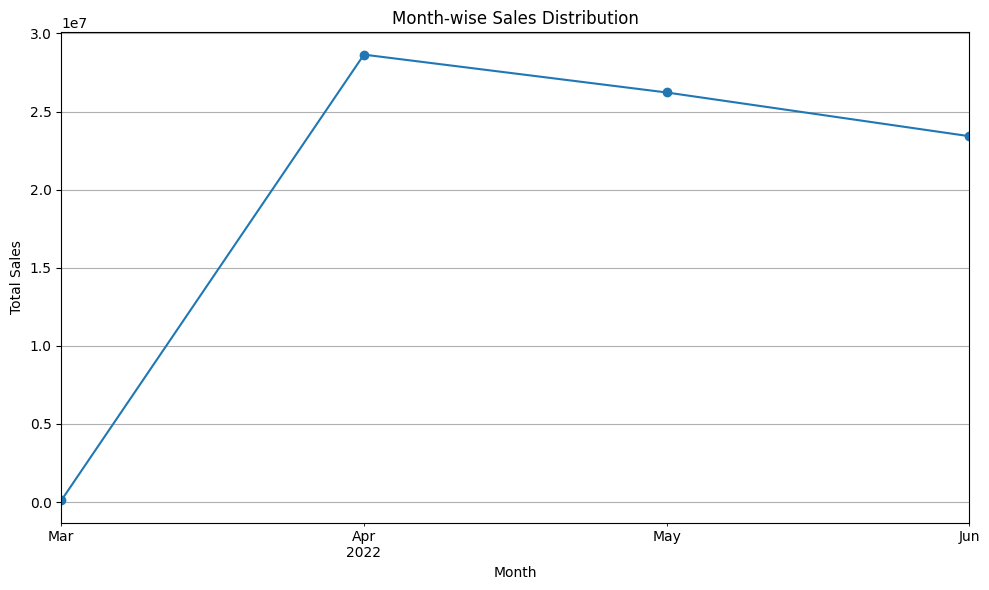

In [216]:
plt.figure(figsize=(10, 6))
df.groupby(time['Date'].dt.to_period('M'))['Amount'].sum().plot(marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Sales Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

`Reason of low sales in april is due to less numberof records in the data`

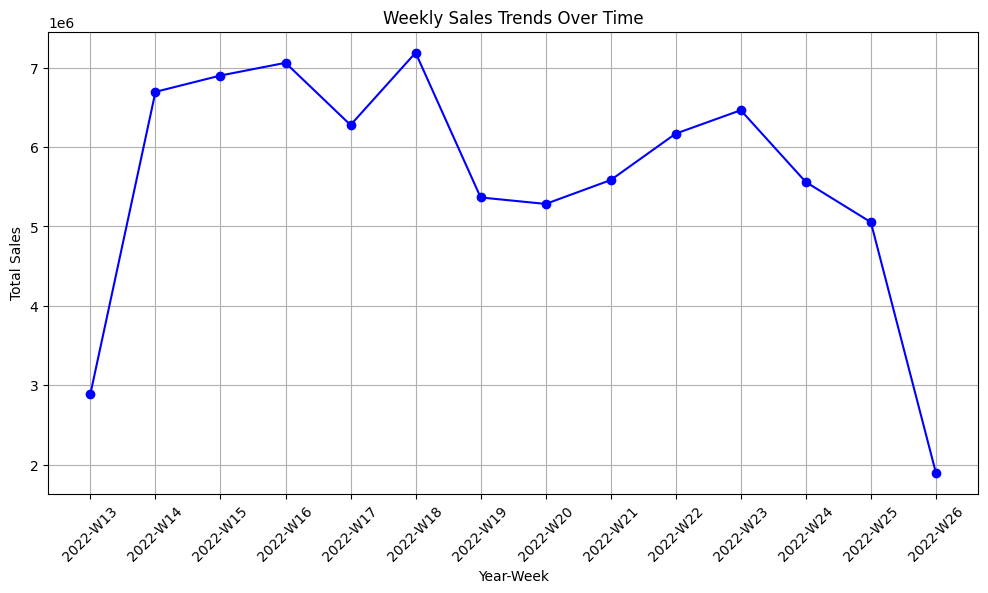

In [217]:

# Extract year and week number for weekly trend analysis
time['Year'] = time['Date'].dt.year
time['Week'] = time['Date'].dt.isocalendar().week

# Group by year and week to calculate total sales for each week
weekly_sales = time.groupby(['Year', 'Week'])['Amount'].sum().reset_index()

# Combine Year and Week into a single date representation for plotting
weekly_sales['Year-Week'] = weekly_sales['Year'].astype(str) + '-W' + weekly_sales['Week'].astype(str)

# Plot the weekly sales trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Year-Week'], weekly_sales['Amount'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Weekly Sales Trends Over Time')
plt.xlabel('Year-Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


**Observations:**

**Significant Increase:** `There is a dramatic increase in sales from March to April 2022, indicating a substantial rise in sales volume.`

**High Sales Plateau:** `Sales remained high through May and June 2022, though there is a noticeable decline from April to June.`

**Possible Factors:** `The sharp rise and subsequent fluctuations may be influenced by factors such as promotional activities, seasonal demand, or operational changes.`

`These insights highlight a period of substantial growth followed by a decline, which can be further investigated to understand the underlying causes and adjust strategies accordingly.`

## 5. Product analysis

In [218]:
# total sales vs category
df.groupby('Category',as_index=False).sum()[['Amount','Category']].sort_values(by='Amount',ascending=False)

,Amount,Category
5,39092559.69,T-shirt
2,21234217.32,Shirt
0,11201173.12,Blazzer
6,5335837.30,Trousers
1,789419.66,Perfume
7,458408.18,Wallet
4,150037.50,Socks
3,123114.76,Shoes
8,915.00,Watch


<ipython-input-219-2b97cff9a788>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




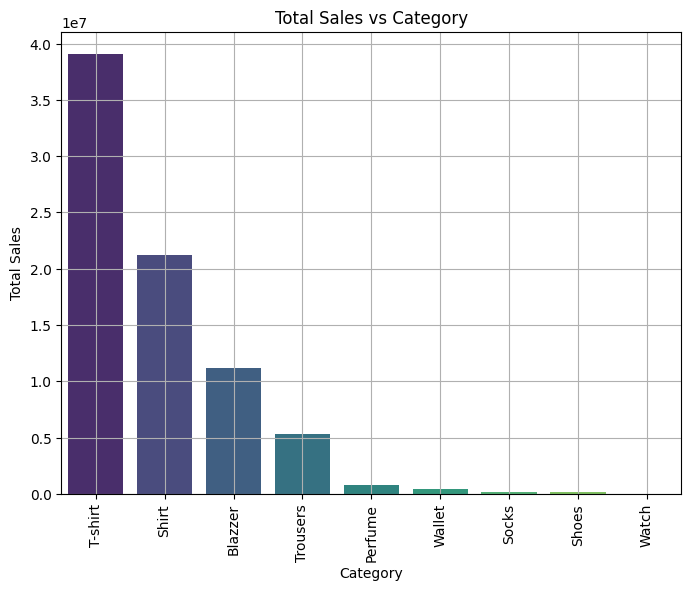

In [219]:
# Aggregate sales by category and taking only top 10 category
Category_sales = df.groupby('Category',as_index=False).sum()[['Amount','Category']].sort_values(by='Amount',ascending=False).head(10)

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Amount', data=Category_sales, palette='viridis')
plt.title('Total Sales vs Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(True)
# Rotate the x-labels to be vertical
plt.xticks(rotation=90)
plt.show()

**Observations:**

**Top Seller:** `The T-shirt category leads with the highest sales, significantly outperforming other categories.`

**Strong Performance:** `The Shirt and Blazer categories also show strong sales figures, contributing substantially to overall revenue.`

**Lower Sales:** `Categories like Perfume, Wallet, Socks, Shoes, and Watch have comparatively lower sales, with Watches having the smallest sales amount.`

`These insights highlight the dominant categories and can help in making informed decisions about inventory, marketing focus, and product strategy.`

#### Total sales vs ship-country

In [220]:
# total sales vs ship-country
df.groupby('ship-country',as_index=False).sum()[['Amount','ship-country']].sort_values(by='Amount',ascending=False)

,Amount,ship-country
0,78385682.53,IN


#### Catgeory and sizes

In [221]:
df.groupby(['Category','Size'],as_index=False).sum()[['Category','Size','Qty']]

,Category,Size,Qty
0,Blazzer,3XL,1758
1,Blazzer,L,2541
2,Blazzer,M,2322
3,Blazzer,S,1961
4,Blazzer,XL,2120
5,Blazzer,XS,1279
6,Blazzer,XXL,1943
7,Perfume,Free,1051
8,Shirt,3XL,5117
9,Shirt,4XL,350


`Graph`

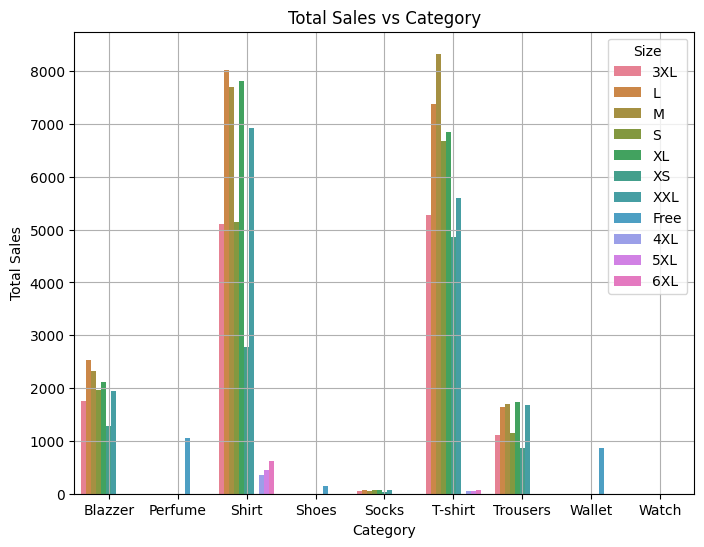

In [222]:
# Aggregate sales by fulfilment method
category_qty_sales = df.groupby(['Category','Size'],as_index=False).sum()[['Category','Size','Qty']]

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Qty', data=category_qty_sales,hue='Size')
plt.title('Total Sales vs Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [223]:
category_qty_sales = df.groupby(['Category','Size'],as_index=False).sum()[['Category','Size','Qty']]
fig = px.bar(x='Size', y='Qty', data_frame=category_qty_sales,color='Category')
fig.update_layout(
    width=800,  # Set width
    height=600  # Set height
)
fig.show()

**Summary**

`Blazers and Perfumes are popular across a range of sizes, with significant quantities sold.`

`Shirts and T-shirts have high sales in larger sizes but limited in the largest sizes.`

`Shoes and Watches have very specific sales patterns, with free size shoes and minimal sales for watches.`

`Socks and Trousers have more uniform sales across sizes, except for some sizes with lower sales.`

`These insights can guide inventory management, size distribution, and marketing strategies for each product category.`

#### qunatity sold for each item

In [224]:
df.groupby('Category',as_index=False).sum()[['Category','Qty']].sort_values(by='Qty',ascending=False)

,Category,Qty
5,T-shirt,45153
2,Shirt,44899
0,Blazzer,13924
6,Trousers,9879
1,Perfume,1051
7,Wallet,863
4,Socks,397
3,Shoes,151
8,Watch,3


<ipython-input-225-611c3a9e3dc9>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




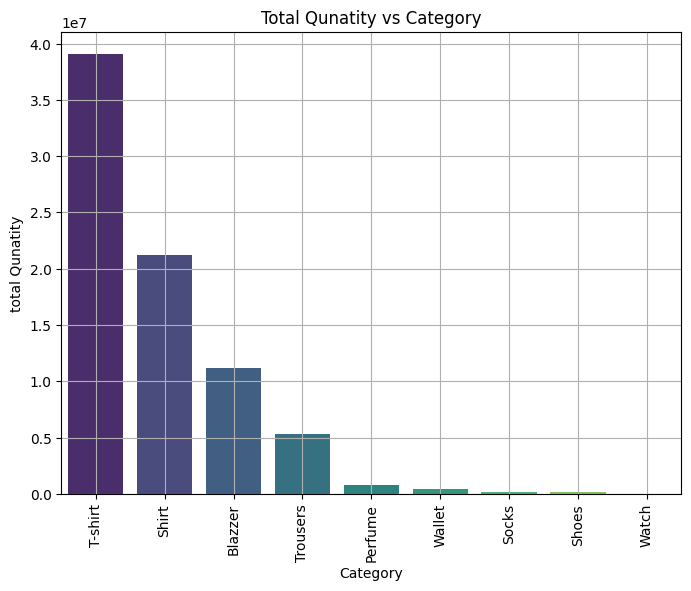

In [225]:
# Aggregate sales by category and taking only top 10 category
Category_qty = df.groupby('Category',as_index=False).sum()[['Category','Qty']].sort_values(by='Qty',ascending=False)

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Amount', data=Category_sales, palette='viridis')
plt.title('Total Qunatity vs Category')
plt.xlabel('Category')
plt.ylabel('total Qunatity')
plt.grid(True)
# Rotate the x-labels to be vertical
plt.xticks(rotation=90)
plt.show()

## 6. Fulfilment


#### Sales by Fullfillment

In [226]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [227]:
# total sales vs Fulfilment
df.groupby('Fulfilment',as_index=False).sum()[['Amount','Fulfilment']].sort_values(by='Amount',ascending=False)

,Amount,Fulfilment
0,54186875.00,Amazon
1,24198807.53,Merchant


#### Fulfilment by Merchant

In [228]:
df[df['Fulfilment'] == 'Merchant'][['Fulfilment','fulfilled-by']].value_counts()

,,count
Fulfilment,fulfilled-by,
Merchant,Easy Ship,39150


**Implications in Your Data:**

**Fulfillment by Merchant:** `If an order in your dataset is marked as "Fulfilled by Merchant," it means the seller handled the entire process, from warehousing to delivery.`

**Fulfilled by Easy-Ship:** `If an order is marked as "Fulfilled by Easy-Ship," it indicates that the seller prepared the package, but a third-party service handled the shipping and delivery.`

#### Fulfilment by Amazon

In [229]:
df[df['Fulfilment']=='Amazon']

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN
16,16,406-9379318-6555504,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,329.0,JAIPUR,RAJASTHAN,302020.0,IN,False,NaN
17,17,405-9013803-8009918,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,399.0,NEW DELHI,DELHI,110074.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,GUJARAT,389350.0,IN,False,NaN


In [230]:
df[df['Fulfilment'] == 'Amazon'][['Fulfilment','fulfilled-by']].value_counts()

,,count
Fulfilment,fulfilled-by,


`Fulfillment by Amazon (FBA) is a service offered by Amazon where sellers can store their products in Amazon's fulfillment centers. Amazon then takes care of the logistics involved in processing orders, including picking, packing, shipping, and providing customer service for these products`

``Missing Information: The "fulfilled-by" field is supposed to indicate the party responsible for fulfilling the order. If it is null, this information is missing, which could be due to an error during data entry, processing, or extraction.``

**Conclusion:**

`A "Fulfillment by Amazon" order with a null "fulfilled-by" field likely points to a data issue. It’s crucial to investigate and address the root cause to ensure data integrity, especially if fulfillment information is critical to your analysis.`

#### Fulfilment vs Sales graph

<ipython-input-231-1e74a7cae26e>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




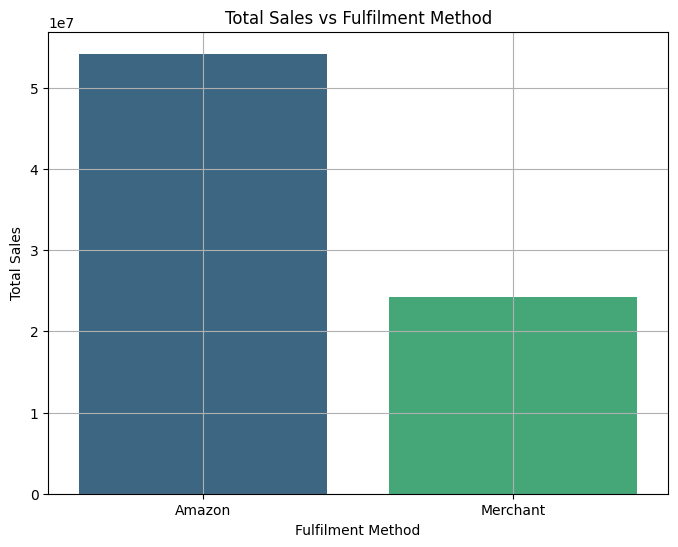

In [231]:
# Aggregate sales by fulfilment method
fulfilment_sales = df.groupby('Fulfilment',as_index=False).sum()[['Amount','Fulfilment']].sort_values(by='Amount',ascending=False)

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='Fulfilment', y='Amount', data=fulfilment_sales, palette='viridis')
plt.title('Total Sales vs Fulfilment Method')
plt.xlabel('Fulfilment Method')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [232]:
# total sales vs fullfilemt-by
df.groupby('fulfilled-by',as_index=False).sum()[['Amount','fulfilled-by']].sort_values(by='Amount',ascending=False)

,Amount,fulfilled-by
0,24198807.53,Easy Ship


## 7. Customer segemntation

`Customer prefences`

<ipython-input-233-2b97cff9a788>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




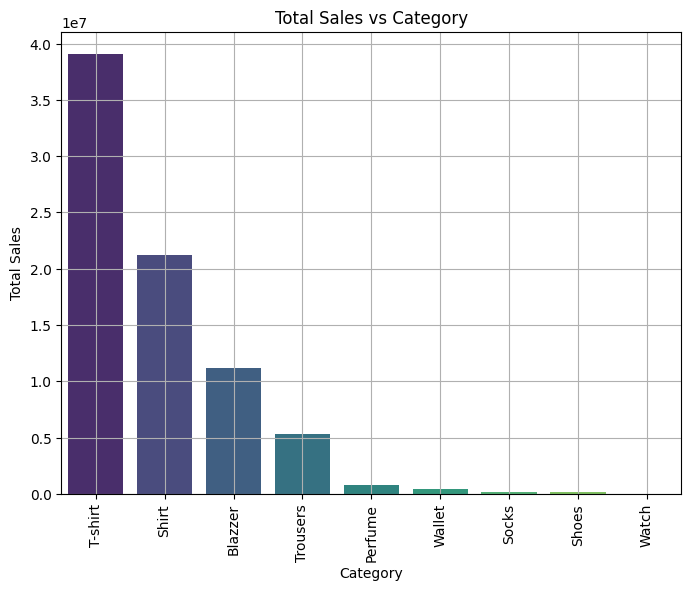

In [233]:
# Aggregate sales by category and taking only top 10 category
Category_sales = df.groupby('Category',as_index=False).sum()[['Amount','Category']].sort_values(by='Amount',ascending=False).head(10)

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Amount', data=Category_sales, palette='viridis')
plt.title('Total Sales vs Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(True)
# Rotate the x-labels to be vertical
plt.xticks(rotation=90)
plt.show()

`Customer avergae order value`

In [234]:
df['Amount'].mean()

648.7108863472728

In [235]:
customer_behavior = time.groupby('Order ID').agg({
    'Amount': ['count', 'mean', 'sum'],  # Count of orders, mean order value, and total sales
    'Date': 'nunique',  # Number of unique purchase days (as a proxy for frequency)
}).reset_index()

# Rename columns for clarity
customer_behavior.columns = ['Order ID', 'Order_Count', 'Avg_Order_Value', 'Total_Sales', 'Purchase_Frequency']

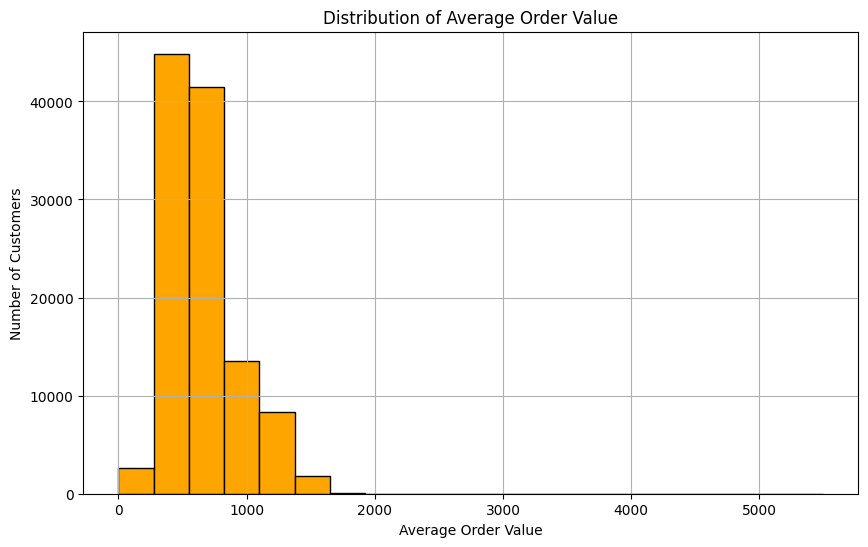

In [236]:
# 4.2 Plot Average Order Value Distribution
plt.figure(figsize=(10, 6))
plt.hist(customer_behavior['Avg_Order_Value'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

`Customer prefered kocation`

<ipython-input-237-9d81e06b6752>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




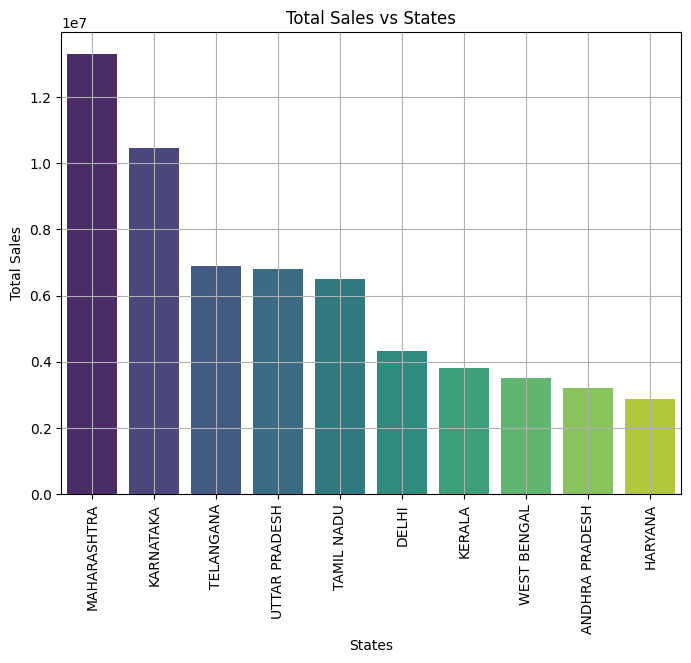

In [237]:
# Aggregate sales by ship-states by taking only top 10 states
states_sales = df.groupby('ship-state',as_index=False).sum()[['Amount','ship-state']].sort_values(by='Amount',ascending=False).head(10)

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='ship-state', y='Amount', data=states_sales, palette='viridis')
plt.title('Total Sales vs States')
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.grid(True)
# Rotate the x-labels to be vertical
plt.xticks(rotation=90)
plt.show()

In [238]:
df.groupby('ship-state',as_index=False).sum()[['ship-state','Amount']].sort_values(by='Amount',ascending=False).head(10)

,ship-state,Amount
20,MAHARASHTRA,13297599.71
15,KARNATAKA,10450079.84
32,TELANGANA,6904322.08
34,UTTAR PRADESH,6804305.08
31,TAMIL NADU,6501825.16
8,DELHI,4334619.46
16,KERALA,3820435.58
36,WEST BENGAL,3499234.06
1,ANDHRA PRADESH,3211859.86
11,HARYANA,2877937.99


In [239]:
df.groupby('ship-state',as_index=False).sum()[['ship-state','Amount']].sort_values(by='Amount',ascending=True).head(10)

,ship-state,Amount
18,LAKSHADWEEP,3175.29
17,LADAKH,38388.43
23,MIZORAM,41948.71
7,DADRA AND NAGAR,42138.92
25,New Delhi,47109.95
33,TRIPURA,92548.40
2,ARUNACHAL PRADESH,98265.00
22,MEGHALAYA,119871.81
30,SIKKIM,140828.66
24,NAGALAND,145055.67


**Conclusion: Ship-State vs. Sales**

**Top Sales States:**

`Maharashtra leads with the highest sales amount at Rs.13,340,333.05.
Karnataka follows with significant sales of Rs.10,480,694.22.
Telangana and Uttar Pradesh show strong sales figures, contributing Rs.6,915,018.08 and Rs.6,823,947.08, respectively.`

**Other Notable States:**

`Tamil Nadu and Delhi also show substantial sales, with Rs.6,519,182.30 and Rs.4,232,738.97, respectively.`

`Kerala and West Bengal contribute Rs.3,823,559.58 and Rs.3,507,212.82 in sales, respectively.`

**Lower Sales States:**

`LAKSHADWEEP and LADAKH show lower sales figures compared to the top states, with amounts of Rs.3175.29 and Rs.38388.43, respectively.`

**Summary**

`The sales distribution indicates that major states like Maharashtra, Karnataka, and Telangana contribute the highest sales. States with substantial sales should be prioritized for marketing and inventory strategies, while states with lower sales may need targeted initiatives to boost performance.`

`ship-service-level by customers`

In [240]:
df['ship-service-level'].value_counts()

,count
ship-service-level,
Expedited,88377
Standard,40231


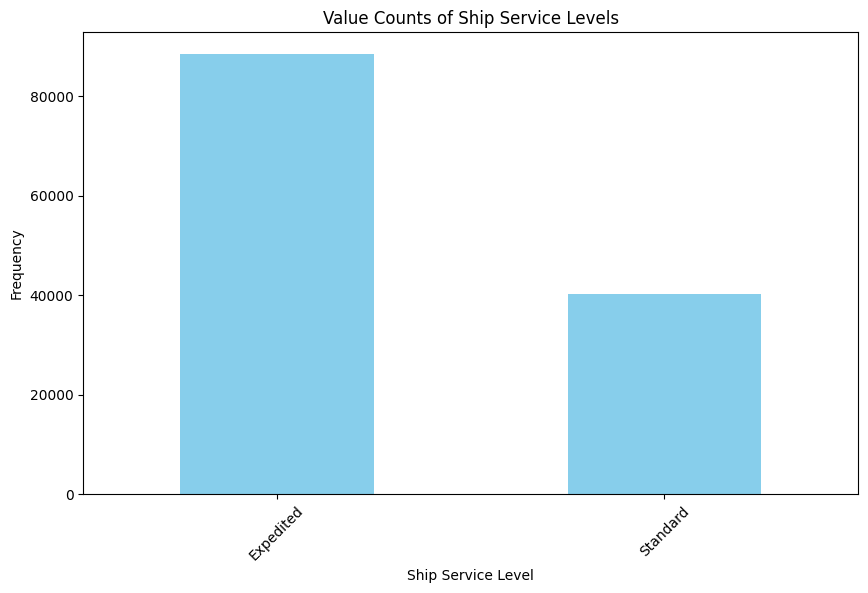

In [241]:
value_counts = df['ship-service-level'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Ship Service Levels')
plt.xlabel('Ship Service Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Summary**

`Expedited shipping is the preferred choice among customers, reflecting a strong preference for quicker delivery times. The lower volume of standard shipping suggests that while it's still relevant, most customers opt for expedited options when available. This insight can help in optimizing logistics and focusing on improving expedited shipping services.`

## 8. Geographical Analysis

#### Total sales vs ship-city

In [242]:
# Total sales vs state
# Top 10 states
df.groupby('ship-state',as_index=False).sum()[['Amount','ship-state']].sort_values(by='Amount',ascending=False).head(10)

,Amount,ship-state
20,13297599.71,MAHARASHTRA
15,10450079.84,KARNATAKA
32,6904322.08,TELANGANA
34,6804305.08,UTTAR PRADESH
31,6501825.16,TAMIL NADU
8,4334619.46,DELHI
16,3820435.58,KERALA
36,3499234.06,WEST BENGAL
1,3211859.86,ANDHRA PRADESH
11,2877937.99,HARYANA


<ipython-input-243-9d81e06b6752>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




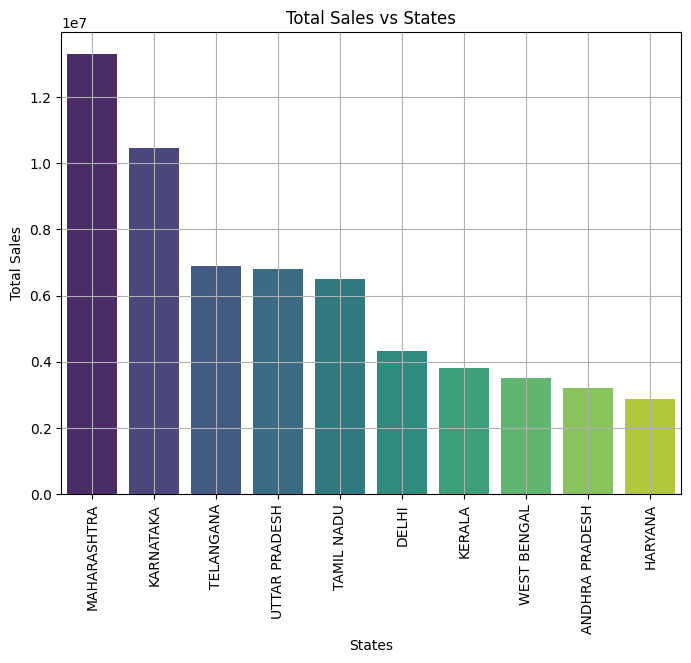

In [243]:
# Aggregate sales by ship-states by taking only top 10 states
states_sales = df.groupby('ship-state',as_index=False).sum()[['Amount','ship-state']].sort_values(by='Amount',ascending=False).head(10)

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='ship-state', y='Amount', data=states_sales, palette='viridis')
plt.title('Total Sales vs States')
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.grid(True)
# Rotate the x-labels to be vertical
plt.xticks(rotation=90)
plt.show()

#### Total sales with ship-city

In [244]:
# total sales vs city
df.groupby('ship-city',as_index=False).sum()[['Amount','ship-city']].sort_values(by='Amount',ascending=False).head(10)

,Amount,ship-city
772,6827838.65,BENGALURU
2900,4937186.25,HYDERABAD
4789,3691565.04,MUMBAI
5387,3604042.78,NEW DELHI
1460,3094075.74,CHENNAI
6152,2333945.18,PUNE
3706,1412027.87,KOLKATA
2614,1220562.74,GURUGRAM
7577,1003253.29,THANE
4391,929776.34,LUCKNOW


<ipython-input-245-8e8b67548553>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




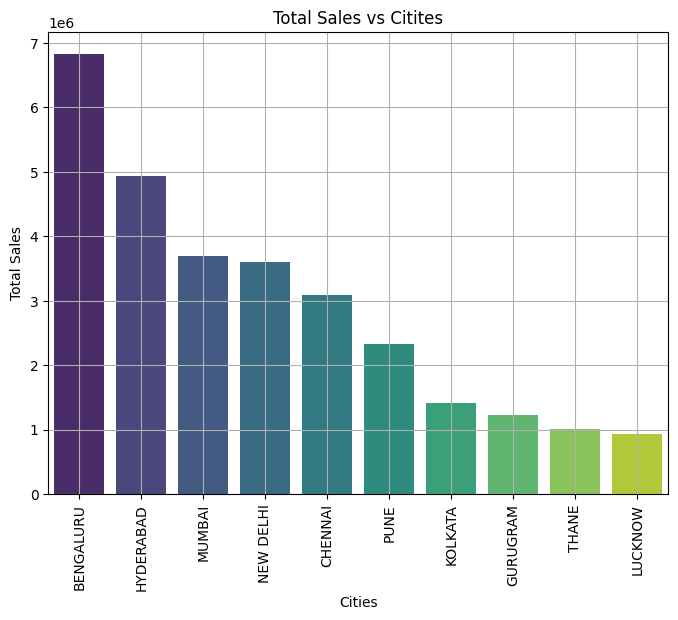

In [245]:
# Aggregate sales with ship-city by taking only top 10 cities
cities_sales = df.groupby('ship-city',as_index=False).sum()[['Amount','ship-city']].sort_values(by='Amount',ascending=False).head(10)

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='ship-city', y='Amount', data=cities_sales, palette='viridis')
plt.title('Total Sales vs Citites')
plt.xlabel('Cities')
plt.ylabel('Total Sales')
plt.grid(True)
# Rotate the x-labels to be vertical
plt.xticks(rotation=90)
plt.show()

## 9. Order Analysis

#### Order Status

In [246]:
df.groupby('Status',as_index=False).sum()[['Status']]

,Status
0,Cancelled
1,Pending
2,Pending - Waiting for Pick Up
3,Shipped
4,Shipped - Damaged
5,Shipped - Delivered to Buyer
6,Shipped - Lost in Transit
7,Shipped - Out for Delivery
8,Shipped - Picked Up
9,Shipped - Rejected by Buyer


In [247]:
df['Status'].value_counts()

,count
Status,
Shipped,77597
Shipped - Delivered to Buyer,28667
Cancelled,18280
Shipped - Returned to Seller,1947
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


<Axes: xlabel='count', ylabel='Status'>

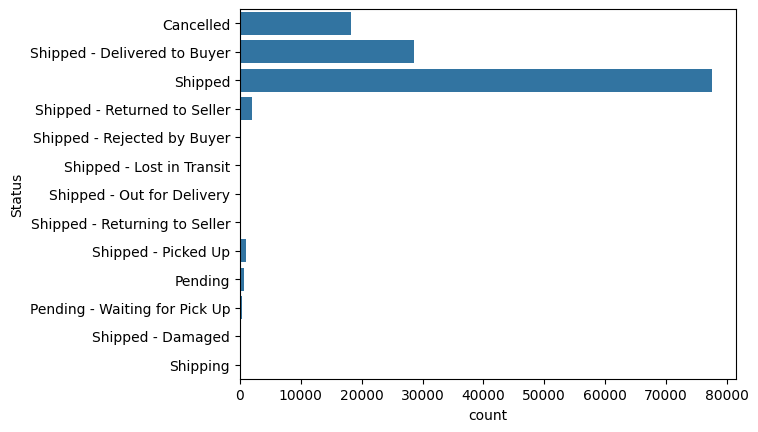

In [248]:
sns.countplot(df['Status'])

## 10. Shipping Analysis

#### Courier status

In [249]:
df['Courier Status'].value_counts()

,count
Courier Status,
Shipped,109172
On the Way,6853
Unshipped,6668
Cancelled,5915


In [250]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [251]:
# analyzing couier status is shiiped w.r.t status
df[df['Courier Status'] == 'Shipped']['Status'].value_counts()

,count
Status,
Shipped,77389
Shipped - Delivered to Buyer,28659
Shipped - Returned to Seller,1944
Shipped - Picked Up,973
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35
Shipped - Rejected by Buyer,11
Pending,10
Shipped - Lost in Transit,5


**Analysis and Implications:**

**High Success Rate:**

`The majority of orders under the 'Shipped' courier status have been delivered to the buyer (28,659 successfully delivered out of 109,486 total "Shipped" status records), indicating a generally efficient shipping process.`

**In-Transit Orders:**

`A significant number (77,597) of orders are still in the "Shipped" status, meaning they are either still on their way or haven't been updated in the system yet. Monitoring these orders is crucial to ensure they progress to delivery without delays or issues.`

**Returns and Failures:**

`The data shows 19,44 returns, 145 orders returning to the seller, 11 rejections, 5 lost, and 1 damaged order. These represent challenges in the fulfillment process, potentially leading to customer dissatisfaction.
The "Shipped - Returned to Seller" and "Shipped - Returning to Seller" statuses should be further analyzed to understand the reasons for returns and to develop strategies to minimize them.`

**Pending Orders:**

`The 10 pending orders, despite being shipped, suggest there might be a processing or system issue that needs addressing to avoid delays or confusion.`

**Critical Failures:**

`The 5 lost and 1 damaged order are critical issues. Even though the numbers are small, they represent potential financial loss and harm to customer relationships. Investigating these cases can help in improving packaging, courier selection, or tracking processes.`

**Potential Actions:**

**Process Improvement:** `Analyze the reasons behind returned, rejected, lost, and damaged orders. Implement process improvements such as better packaging, more reliable couriers, or improved communication with customers regarding delivery times and expectations.`

**System Monitoring:** `Keep a close watch on the 77,607 in-transit orders to ensure they are progressing toward delivery. Regular updates and tracking can help mitigate delays and provide better service to customers.`

**Customer Feedback:** `For orders marked as "Rejected by Buyer," gather feedback to understand the reasons behind the rejection. This can inform changes in product quality, descriptions, or shipping practices.`

**Focus on Lost and Damaged Orders:** `Investigate the specific instances of lost and damaged orders to identify the root causes and prevent future occurrences.`

In [252]:
# analyzing courier status as cancelled
df[df['Courier Status'] == 'Cancelled']['Status'].value_counts()

,count
Status,
Cancelled,5820
Shipped,93
Pending,2


**Potential Actions:**

**Investigate the Shipped-Cancelled Orders:** `The 93 records where the order status is "Shipped" but the courier status is "Cancelled" should be investigated. Determine if these orders were actually delivered or if they were indeed stopped mid-transit. This might involve looking into the specific cases or reviewing the system that tracks these statuses.`

**Review Pending-Cancelled Orders:** `The 2 records with a status of "Pending" should be reviewed to ensure there's no error in the order processing system.`

**Process Improvement:** `If these scenarios are not expected behaviors, consider reviewing your order and fulfillment processes to reduce such occurrences. It may also be worth auditing the system that updates and manages order and courier statuses to prevent discrepancies.`

In [253]:
# analyzing courier status as On the Way
df[df['Courier Status'] == 'On the Way']['Status'].value_counts()

,count
Status,
Cancelled,6842
Shipped - Delivered to Buyer,8
Shipped - Returned to Seller,3


**Interpretation:**

**Courier Status:** `"On the Way" with Status: "Cancelled" (6,842 records):`

- **Meaning:** `These orders were canceled by the customer or seller, but they were already in transit ("On the Way") when the cancellation occurred.`

- **Implications:**
`The courier may need to intercept and return these orders to the seller or stop the delivery process.`

`This situation could indicate a potential issue with the timing of the cancellation, suggesting that cancellations are occurring after the order has already been dispatched.`

`It might also require additional handling by the courier to manage these returns, leading to increased operational costs and complexity.`

**Courier Status:** `"On the Way" with Status: "Shipped - Delivered to Buyer" (8 records):`

- **Meaning:** `These orders have been marked as delivered to the buyer, but the system still shows them as "On the Way."`

- **Implications:**
`There could be a delay or error in updating the courier status to "Delivered." This might suggest a need for better synchronization between the courier’s tracking system and the seller's order management system.`

`It's also possible that these orders were marked as delivered after the status was updated to "On the Way," but the courier system was not updated promptly.`

**Courier Status:** `"On the Way" with Status: "Shipped - Returned to Seller" (3 records):`

- **Meaning:** `These orders were intended to be returned to the seller but are still marked as "On the Way" in the courier's system.`

- **Implications:**
`This suggests a discrepancy where the order was supposed to be returned, but the courier's tracking hasn't yet been updated to reflect the return status.
There might be a delay or error in processing the return, or the system might not have been updated in real-time.`

**Potential Actions:**

**Investigate Cancelled Orders:**

**Process Improvement:** `Review the process for handling cancellations to ensure they are processed before the order is dispatched. This could involve tightening the timing between order cancellation and dispatch or improving communication between the customer, seller, and courier service.`

**Courier Coordination:** `Work closely with the courier service to manage these "On the Way" but canceled orders. Ensure there are clear protocols for returning or stopping the delivery of such orders.`

**Improve System Synchronization:**

`Ensure that the courier's tracking system is fully synchronized with the seller's order management system to avoid discrepancies, such as orders being marked as "Delivered" while still showing "On the Way" in the courier's system.`

**Address Returns in Transit:**

`For the orders marked as "Shipped - Returned to Seller," ensure that the return process is clearly communicated and tracked in both the seller's and courier's systems. This will help prevent confusion and ensure that returned orders are processed efficiently.`

In [254]:
# analyzing courier status as Unshipped
df[df['Courier Status'] == 'Unshipped']['Status'].value_counts()

,count
Status,
Cancelled,5618
Pending,646
Pending - Waiting for Pick Up,281
Shipped,115
Shipping,8


**Interpretation:**

**Courier Status:** `"Unshipped" with Status: "Cancelled" (5,618 records):`

- **Meaning:** `These orders were canceled before they were shipped. The "Unshipped" courier status indicates that the order never left the seller’s facility.`

- **Implications:**
`This is a common and expected situation where an order is canceled during the processing stage before the courier picks it up. No further action is needed by the courier.`

`It's essential to ensure that these cancellations are handled promptly to avoid unnecessary processing or packaging.`

**Courier Status:** `"Unshipped" with Status: "Pending" (646 records):`

- **Meaning:** `These orders are in a "Pending" status and have not yet been shipped.`

- **Implications:**
`The order is likely still being processed, awaiting further actions such as packaging, payment confirmation, or scheduling for pickup by the courier.
This scenario is normal for orders that are in the early stages of fulfillment.`
`It might be worth monitoring these orders to ensure they move forward in the process without undue delay.`

**Courier Status:** `"Unshipped" with Status: "Pending - Waiting for Pick Up" (281 records):`

- **Meaning:** `These orders are pending and are waiting to be picked up by the courier, but they have not yet been shipped.`

- **Implications:**
`The orders are ready but haven't been handed over to the courier. This could be due to scheduling, awaiting payment clearance, or other logistical reasons.
This status suggests that the orders are nearly ready to be shipped, and the next step is for the courier to pick them up.`

**Courier Status:** `"Unshipped" with Status: "Shipped" (115 records):`

- **Meaning:** `There is a discrepancy here—these orders are marked as "Shipped" in the order status but still show as "Unshipped" in the courier status.`

- **Implications:**
`This could indicate a lag or error in updating the courier status after the order has been shipped.`

`The system might need to be checked to ensure that it correctly updates both the order status and courier status simultaneously. This discrepancy should be investigated to ensure orders are correctly tracked and reported.`

**Courier Status:** `"Unshipped" with Status: "Shipping" (8 records):`

- **Meaning:** `Similar to the "Shipped" status, these orders are marked as "Shipping" but the courier status remains "Unshipped."`

- **Implications:**
`This may suggest that the process of shipping has started, but the system has not yet updated the courier status to reflect that the package has been handed over for delivery.`

`This situation should be monitored, and any discrepancies should be resolved to ensure accurate tracking and reporting.`

**Potential Actions:**

**Monitor and Improve Cancellation Process:**

`The high number of canceled orders in the "Unshipped" courier status suggests that the cancellation process is working as intended, preventing unnecessary shipping. However, it might be useful to analyze why these orders were canceled and see if any patterns or common reasons emerge that could inform business decisions.`

**Track Pending and Ready-to-Ship Orders:**

`Ensure that "Pending" and "Pending - Waiting for Pick Up" orders are moving through the fulfillment process in a timely manner. This could involve monitoring these orders to ensure they don’t remain in these statuses for too long.`

**Investigate Discrepancies in Shipped/Shipping Statuses:**

`The discrepancies between "Shipped" or "Shipping" order statuses and "Unshipped" courier statuses should be investigated. This may require a review of the systems that update these statuses to ensure they are synchronized and accurate.`

**Improve System Synchronization:**

`Consider implementing checks or notifications for when there is a mismatch between order status and courier status. This can help in catching and resolving such issues early, ensuring that orders are tracked accurately through the entire fulfillment process.`

#### Ship-service level vs status

In [255]:
# Group data by 'ship-service-level' and 'status'
grouped_data = df.groupby(['ship-service-level', 'Status']).size().reset_index(name='count')
print(grouped_data)


   ship-service-level                         Status  count
0           Expedited                      Cancelled  11390
1           Expedited                        Pending    413
2           Expedited                        Shipped  76574
3            Standard                      Cancelled   6890
4            Standard                        Pending    245
5            Standard  Pending - Waiting for Pick Up    281
6            Standard                        Shipped   1023
7            Standard              Shipped - Damaged      1
8            Standard   Shipped - Delivered to Buyer  28667
9            Standard      Shipped - Lost in Transit      5
10           Standard     Shipped - Out for Delivery     35
11           Standard            Shipped - Picked Up    973
12           Standard    Shipped - Rejected by Buyer     11
13           Standard   Shipped - Returned to Seller   1947
14           Standard  Shipped - Returning to Seller    145
15           Standard                   

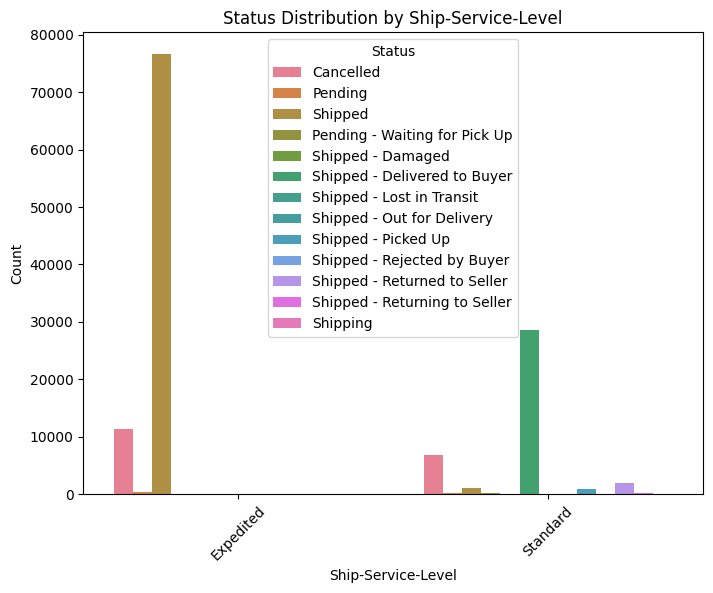

In [256]:

plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='ship-service-level', y='count', hue='Status')
plt.xticks(rotation=45)
plt.title('Status Distribution by Ship-Service-Level')
plt.xlabel('Ship-Service-Level')
plt.ylabel('Count')
plt.show()


In [257]:
df['ship-service-level'].value_counts()

,count
ship-service-level,
Expedited,88377
Standard,40231


In [258]:
df.groupby('ship-service-level',as_index=False).sum()[['Amount','ship-service-level']]

,Amount,ship-service-level
0,54150489.00,Expedited
1,24235193.53,Standard


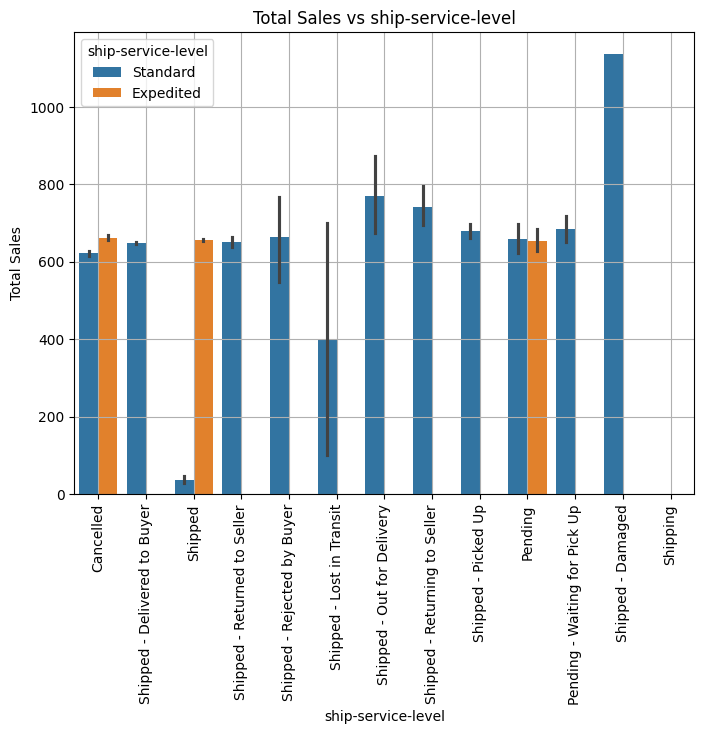

In [259]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Amount', data=df,hue='ship-service-level')
plt.title('Total Sales vs ship-service-level')
plt.xlabel('ship-service-level')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [260]:
df[df['ship-service-level'] == 'Expedited']['Amount'].mean().round(2)

656.33

In [261]:
df[df['ship-service-level'] == 'Standard']['Amount'].mean().round(2)

632.31

**Analysis and Interpretation:**

- **Expedited Service Dominance:**

`The majority of orders (88,377) are being shipped using the Expedited service level, which represents about 69% of the total orders (88,630 out of 128,976 total orders).`

`This suggests that a significant number of customers prefer faster shipping, which might indicate a higher level of urgency or a willingness to pay more for quicker delivery.`

- **Revenue Contribution:**

`Expedited shipping accounts for $54,291,154.00 in sales, which is a substantial portion of the total sales revenue.
Standard shipping, while handling fewer orders, still contributes $24,299,016.25, which is approximately 31% of the total sales revenue.`

- **Average Revenue per Order:**

`Expedited: The average revenue per order for Expedited shipping is approximately $612.48 ($54,150,489.00	 / 88,377 orders).`

`Standard: The average revenue per order for Standard shipping is approximately $602.14 ($24,235,193.53 / 40,231 orders).`

`This indicates that the average order value is slightly higher for Expedited shipping compared to Standard shipping, which might suggest that customers who choose faster shipping options tend to spend more.`

- **Customer Behavior Insight:**

`The data indicates a preference for faster delivery among a substantial portion of customers, which could be due to various factors such as product type, customer demographics, or marketing strategies.`

`The willingness of customers to opt for Expedited shipping might also imply that they are purchasing items that are needed urgently or that the products themselves justify the additional shipping cost.`

**Strategic Implications:**

- **Inventory and Logistics Planning:**

`Since a large proportion of orders are using Expedited shipping, it’s crucial to ensure that inventory levels are managed effectively to meet this demand.`

`Faster shipping requires efficient warehousing and logistics processes.`

- **Marketing Opportunities:**

`The preference for Expedited shipping could be leveraged in marketing strategies. For example, offering promotions or discounts on Expedited shipping could attract more customers, potentially increasing overall sales.`

- **Customer Experience:**

`Maintaining high service levels for Expedited shipping is important, as customers who pay for faster delivery are likely to have higher expectations for timely and accurate deliveries. Ensuring that these expectations are met can lead to better customer satisfaction and loyalty.`

- **Pricing Strategy:**

`The slight difference in average revenue per order between Expedited and Standard shipping could inform pricing strategies, possibly encouraging customers to upgrade to faster shipping options with minimal price incentives.`

**Conclusion:**

`The data indicates a strong preference for Expedited shipping among your customers, with Expedited orders contributing a larger share of both the order volume and sales revenue. This suggests that customers value faster delivery and are willing to pay for it, which can be strategically leveraged to optimize logistics, marketing, and pricing.`

##  11. B2B vs. B2C


`Sales Channel Comparison: Compare B2B ('B2B' == True) and B2C ('B2B' == False) orders in terms of sales, order sizes, fulfillment methods, etc.`

In [262]:
df.groupby('B2B',as_index=False).sum()[['Amount','B2B']].sort_values(by='Amount',ascending=False)

,Amount,B2B
0,77794720.74,False
1,590961.79,True


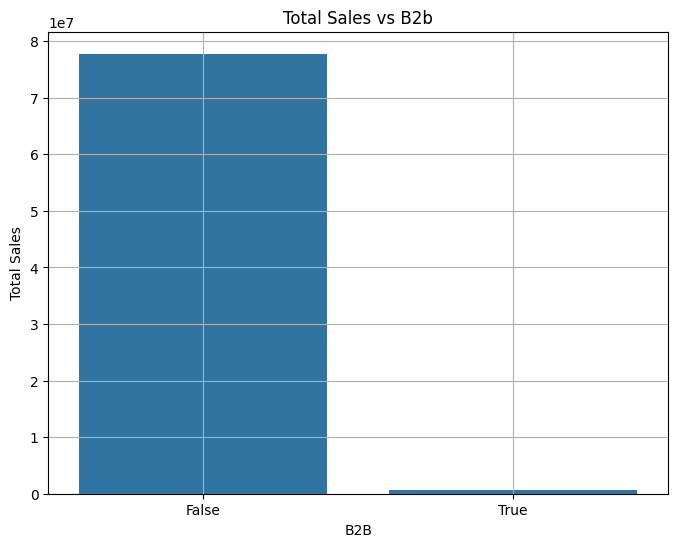

In [263]:
b2b_sales = df.groupby('B2B',as_index=False).sum()[['Amount','B2B']].sort_values(by='Amount',ascending=False)

# Plotting total sales vs fulfilment
plt.figure(figsize=(8, 6))
sns.barplot(x='B2B', y='Amount', data=b2b_sales)
plt.title('Total Sales vs B2b')
plt.xlabel('B2B')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Insights:**

**Dominance of Non-B2B Sales:**

`The vast majority of sales revenue comes from non-B2B transactions, totaling $77,794,720.74. This accounts for nearly 99.25% of the total sales revenue.
This indicates that the business's primary customer base is individual consumers rather than other businesses.`

**Minimal Contribution from B2B Sales:**

``B2B transactions contribute $59,0961.79 to the total sales, which is only about 0.75% of the overall sales revenue.`

`This suggests that B2B sales are a very small segment of the business, either due to a lack of focus on B2B markets or a lower demand for the product among businesses.`

**Conclusion:**

`The data shows that the business is heavily focused on non-B2B (consumer) sales, with B2B transactions contributing only a small fraction to the total revenue. This suggests that the company's current strategies and offerings are primarily consumer-oriented. However, there may be opportunities to grow the B2B segment if the company decides to explore and tap into that market.`

<ipython-input-264-28d1237c08fc>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



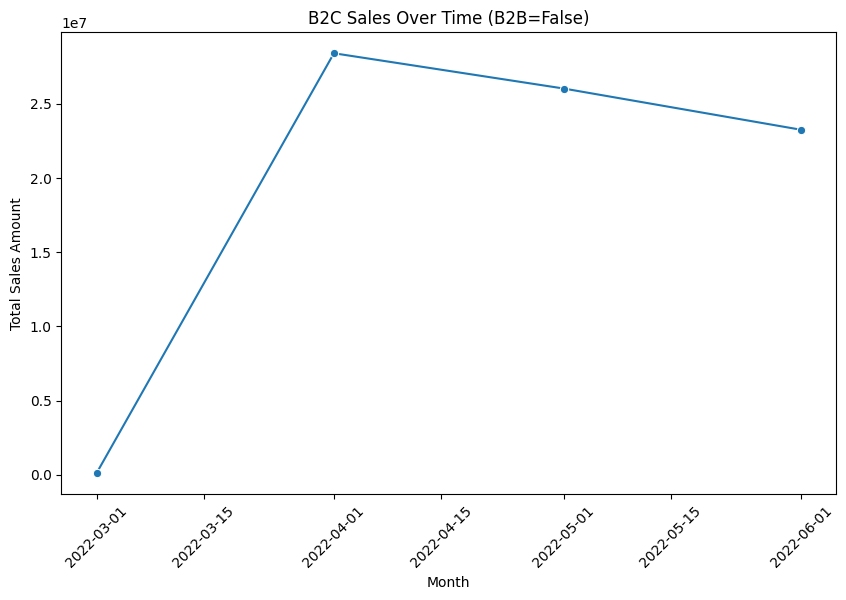

In [264]:
# Filter the DataFrame where B2B is False
b2c_sales = time[time['B2B'] == False]

# Group sales by a specific time period, e.g., by month
b2c_sales['Month'] = b2c_sales['Date'].dt.to_period('M').dt.to_timestamp()  # Convert Period to Timestamp
monthly_b2c_sales = b2c_sales.groupby('Month')['Amount'].sum().reset_index()

# Plotting B2C sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_b2c_sales, x='Month', y='Amount', marker='o')
plt.title('B2C Sales Over Time (B2B=False)')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

<ipython-input-265-f3cd9ebfd6a4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



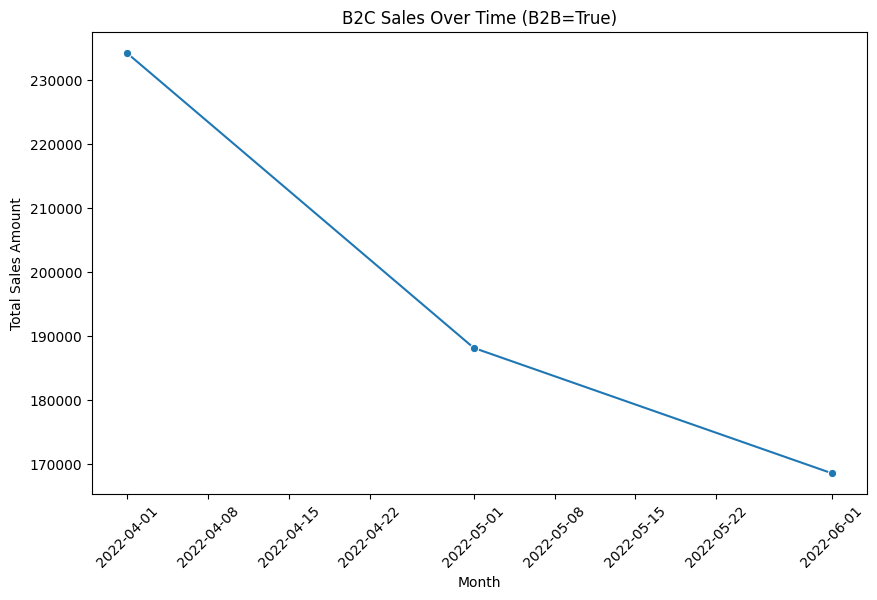

In [265]:
# Filter the DataFrame where B2B is True
b2c_sales = time[time['B2B'] == True]

# Group sales by a specific time period, e.g., by month
b2c_sales['Month'] = b2c_sales['Date'].dt.to_period('M').dt.to_timestamp()  # Convert Period to Timestamp
monthly_b2c_sales = b2c_sales.groupby('Month')['Amount'].sum().reset_index()

# Plotting B2C sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_b2c_sales, x='Month', y='Amount', marker='o')
plt.title('B2C Sales Over Time (B2B=True)')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

**For B2B = True:**

**Investigate Decline:** `Perform a detailed analysis to identify the root causes of the declining B2B sales. Understanding whether the issue is related to product fit, competition, economic factors, or other challenges will be crucial in reversing the trend.`

**Revitalize B2B Strategy:** `Consider revamping the B2B sales approach, possibly through targeted marketing, personalized solutions, or by addressing specific pain points for business customers.`

**Customer Retention:** `Focus on retaining existing B2B customers by offering loyalty programs, customized solutions, or better pricing to prevent further decline.`

**Conclusion:**

`The trends in sales for both B2B=False and B2B=True indicate different challenges and opportunities. While the consumer market (B2B=False) shows a peak and then stabilization, the B2B segment is experiencing a concerning decline. Addressing these trends with tailored strategies will be essential for optimizing overall sales performance.`

##Final Recommendations and Business Insights


####**1. Sales Performance Optimization**
**Observations:**

- **Sales Peaks:** `Significant sales increase from March to April 2022, followed by a decline.`

- **Top Categories:** `T-shirts, shirts, and blazers are the highest performers.
Geographical Insights: Maharashtra and Karnataka lead in sales, while Surat shows data quality issues.`

**Recommendations:**

**Promotional Strategies:**

- **Investigate Sales Spikes:** `Analyze the cause of the sales peak in April. If linked to specific promotions or seasonal trends, replicate successful strategies in future campaigns to sustain sales momentum.`

- **Actionable Insight:** `Use historical sales data to identify successful promotions and plan future campaigns around these insights.`

**Inventory Management:**

- **Increase Stock for High-Performing Categories:** `Ensure higher inventory levels for T-shirts, shirts, and blazers to meet demand and avoid stockouts.`

- **Actionable Insight:** `Implement inventory forecasting based on category performance to optimize stock levels.`

**Regional Focus:**

- **Target Top-Performing States:** `Intensify marketing and inventory strategies in Maharashtra and Karnataka. For states with lower sales, such as Surat, consider targeted promotions to boost performance.`

- **Actionable Insight:** `Customize regional marketing campaigns and adjust inventory based on geographic sales performance.`


####**2. Data Quality and Order Fulfillment**
**Observations:**

**Data Inconsistencies:** `Issues with zero amounts, unfulfilled orders, and discrepancies in order statuses, particularly from Surat.`

`Courier Status Issues: Discrepancies in statuses like "On the Way" and "Delivered."`

**Recommendations:**

**Data Verification:**

- **Conduct Comprehensive Audits:** `Review data entries, especially from Surat, to correct any inconsistencies or errors. Ensure accurate reporting and data integrity.`

- **Actionable Insight:** `Implement regular data audits and validation processes to maintain high data quality.`

- **Process Improvement:**

- **Enhance Order Fulfillment:** `Review and refine order fulfillment processes to resolve discrepancies in shipping statuses. Align order management with courier systems to ensure accuracy.`

- **Actionable Insight:** `Develop and monitor fulfillment metrics to address and resolve operational inefficiencies.`

**Investigation and Correction:**

- **Address Data Anomalies:** `Investigate patterns in data anomalies and consult with relevant stakeholders to implement corrective measures.`

- **Actionable Insight:** `Establish a feedback loop with stakeholders to address and rectify systemic issues.`

####**3. Customer Preferences and Shipping**
**Observations:**

**Shipping Preferences:** `Expedited shipping is preferred and contributes significantly to revenue. It commands slightly higher average revenue per order compared to standard shipping.`

**Recommendations:**

**Optimize Logistics:**

- **Align Logistics with Demand:** `Ensure inventory and distribution are optimized to meet the high demand for expedited shipping. Improve warehousing efficiency to support this preference.`
- **Actionable Insight:** `Enhance logistics infrastructure to efficiently handle expedited shipping requirements.`

**Marketing Opportunities:**

- **Leverage Expedited Shipping Preferences:** `Incorporate expedited shipping options in marketing campaigns and offer incentives to encourage its use.`
- **Actionable Insight:** `Promote expedited shipping benefits in advertising and consider bundling it with other services or discounts.`

**Customer Experience:**

- **Maintain High Service Levels:** `Ensure high service standards for expedited shipping to meet customer expectations and improve satisfaction.`
- **Actionable Insight:** `Monitor customer feedback and performance metrics for expedited shipping to continuously improve service quality.`

####**4. Product and Size Analysis**
**Observations:**

**Product Performance:** `Blazers and perfumes are popular across various sizes, while shirts and T-shirts perform well in larger sizes.`
**Size Distribution**: `Uniform sales patterns with some sizes showing higher or lower sales.`

**Recommendations:**

**Inventory Allocation:**

- **Adjust Based on Sales Patterns:** `Stock high-demand sizes adequately, especially for blazers, shirts, and T-shirts. Reduce inventory for less popular sizes.`
- **Actionable Insight:** `Utilize size-specific sales data to optimize inventory allocation and prevent stock imbalances.`

**Marketing Focus:**

- **Highlight Popular Products and Sizes:** `Tailor marketing efforts to emphasize best-selling products and sizes. Implement promotions for lower-performing categories to increase visibility.`
- **Actionable Insight:** `Design targeted marketing campaigns based on product and size performance to drive sales.`

**Size Analysis:**

- **Adjust Production and Inventory:** `Analyze sales data for different sizes to inform production and inventory strategies. Align inventory with customer preferences for various sizes.`
- **Actionable Insight:** `Use data-driven insights to guide production planning and inventory management.`

####**5. Customer Segmentation and B2B Sales**
**Observations:**

**Non-B2B Dominance:** `The majority of sales come from non-B2B customers.`

**Recommendations:**

**Customer Segmentation:**

- **Develop Targeted Strategies:** `Create specific strategies for different customer segments. Explore opportunities to increase engagement with B2B customers if applicable.`
- **Actionable Insight:** `Analyze customer segmentation to tailor marketing and sales approaches for different groups.`

**Personalized Marketing:**

- **Enhance Engagement:** `Use customer data to personalize marketing efforts and drive higher sales. Focus on delivering personalized offers and communication.`
- **Actionable Insight:** `Implement CRM tools to track customer interactions and personalize marketing campaigns effectively.`

####**6. Data Entry and System Synchronization**
**Observations:**

**System Issues:** `Discrepancies between order statuses and courier statuses suggest potential system errors or misalignments.`

**Recommendations:**

**System Audit:**

- **Regularly Audit and Synchronize Systems:** `Ensure accurate and consistent order tracking by auditing and synchronizing data entry processes and systems.`
- **Actionable Insight:** `Establish routine system checks and updates to maintain data accuracy and system alignment.`

**Training and Guidelines:**

- **Provide Staff Training:** `Educate staff on best practices for data entry and system updates to reduce errors and improve data quality.`
- **Actionable Insight:** `Develop and implement comprehensive training programs and guidelines to ensure accurate data management.`
`By implementing these recommendations, you can optimize sales strategies, enhance inventory management, improve customer service, and drive overall business performance.`

In [266]:
df.to_csv('output.csv', index=False)